In [1]:
import pandas as pd
import numpy as np

### Read Data

In [2]:
df = pd.read_csv("datasets/smoker_train_dataset.csv")
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [19]:
df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [20]:
df.shape

(38984, 23)

In [5]:
df.smoking.value_counts()

0    24666
1    14318
Name: smoking, dtype: int64

### Data Cleaning Steps

####
1. age - check for null, check for outlier values
2. height - check for outlier
3. 

In [31]:
df['weight(kg)'].value_counts()

65     5733
60     5671
70     5413
55     5120
75     4241
50     3872
80     2871
85     1775
45     1661
90     1051
95      601
100     325
40      324
105     145
110      82
115      37
35       30
120      17
30        5
125       5
130       4
135       1
Name: weight(kg), dtype: int64

In [18]:
df[df['weight(kg)'].isna()]

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking


## EDA 

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns

##### Age

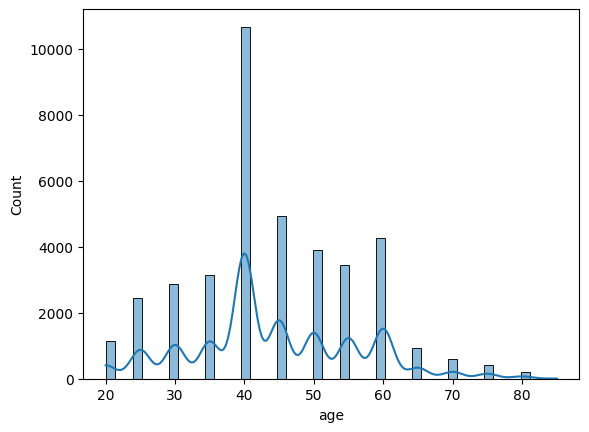

In [36]:
sns.histplot(data=df, x='age', kde=True, bins=50)
plt.show()

### height

In [38]:
df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

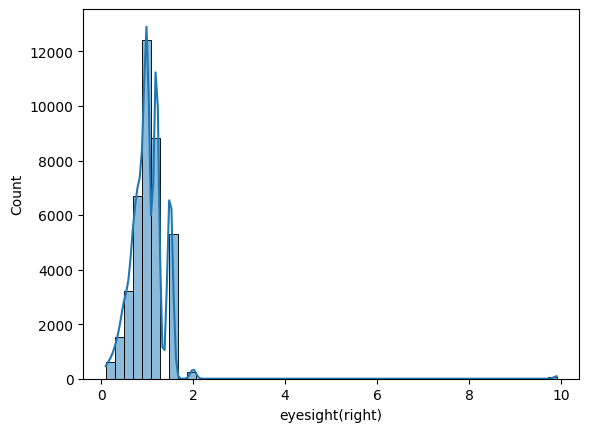

In [43]:
sns.histplot(data=df, x='eyesight(right)', kde=True, bins=50)
plt.show()

<AxesSubplot: >

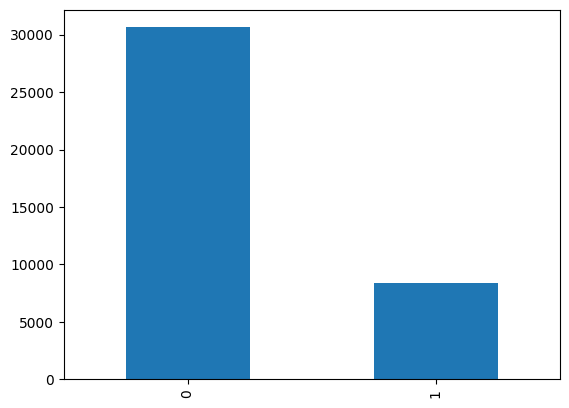

In [48]:
df['dental caries'].value_counts().plot(kind='bar')

In [49]:
df.smoking.value_counts(normalize=True)

0    0.632721
1    0.367279
Name: smoking, dtype: float64

In [50]:
df['hemoglobin'].describe()

count    38984.000000
mean        14.624264
std          1.566528
min          4.900000
25%         13.600000
50%         14.800000
75%         15.800000
max         21.100000
Name: hemoglobin, dtype: float64

<AxesSubplot: xlabel='smoking', ylabel='waist(cm)'>

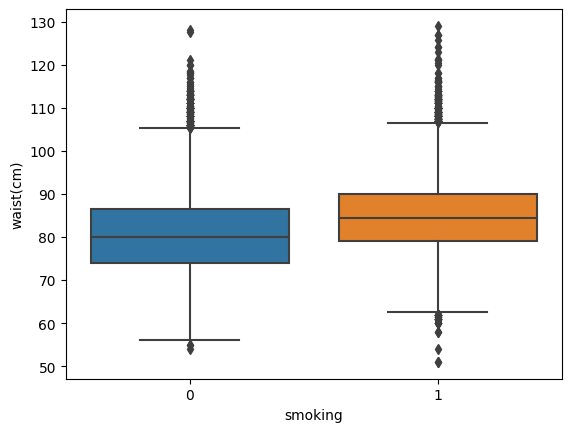

In [64]:
sns.boxplot(data=df, y='waist(cm)', x='smoking')

<AxesSubplot: >

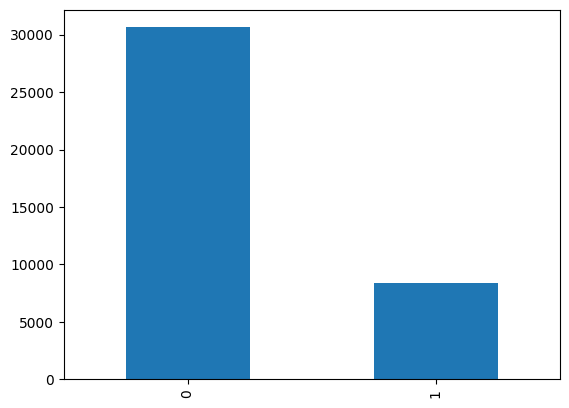

In [66]:
df['dental caries'].value_counts().plot(kind='bar')

In [78]:
tmp_df = df.groupby(["dental caries", 'smoking'])['age'].count().reset_index()
tmp_df = tmp_df.pivot(index='dental caries', columns='smoking', values='age').reset_index(drop=True)
tmp_df.columns = ['non-smoking', 'smoking']
tmp_df.index.name = 'dental caries'
tmp_df = tmp_df.reset_index()
tmp_df.head()

,dental caries,non-smoking,smoking
0,0,20207,10418
1,1,4459,3900


In [80]:
tmp_df['perc_smokers'] = tmp_df['smoking']/(tmp_df['smoking'] + tmp_df['non-smoking'])
tmp_df.head()

,dental caries,non-smoking,smoking,perc_smokers
0,0,20207,10418,0.340180
1,1,4459,3900,0.466563


<AxesSubplot: xlabel='dental caries', ylabel='perc_smokers'>

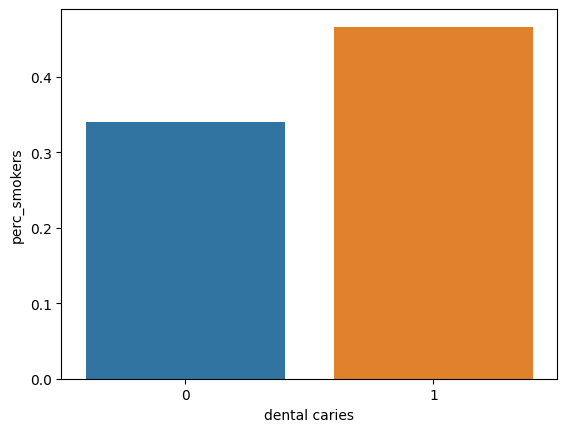

In [81]:
sns.barplot(data=tmp_df, x='dental caries', y='perc_smokers')

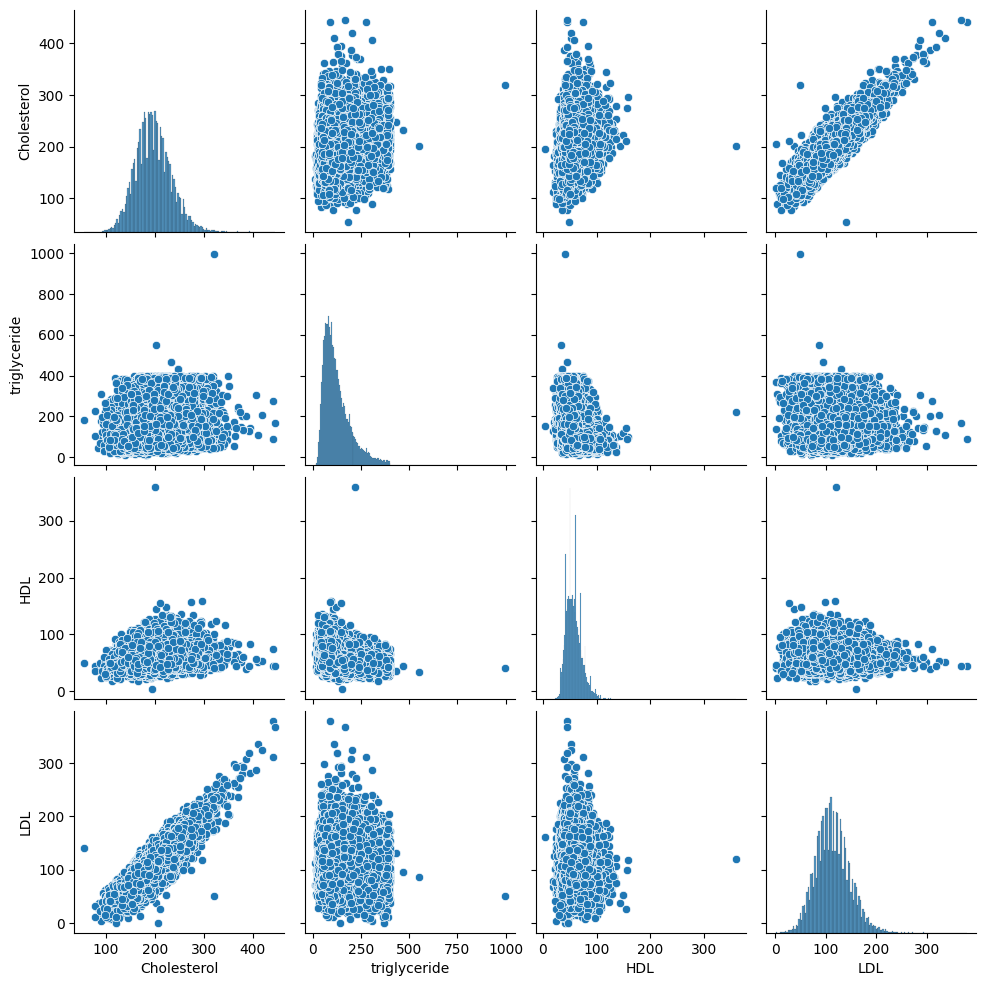

In [116]:
sns.pairplot(data=df[['Cholesterol', 'triglyceride', 'HDL', 'LDL']])

In [84]:
df = df[df.LDL<=500]

## Model

In [143]:
X = df.iloc[:, 0:-1]
y = df.smoking

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from matplotlib import pyplot as plt
import seaborn as sns

In [145]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5)

In [146]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\punee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [159]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
model = RandomForestClassifier(n_estimators=300, random_state=2023,
                               max_features=22, max_depth=20,
                               min_samples_split=int(X_train.shape[0]/10),
                               bootstrap=False, oob_score=False
                              )
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features=22,
                       min_samples_split=3116, n_estimators=300,
                       random_state=2023)

In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from matplotlib import pyplot as plt
import seaborn as sns

In [190]:
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier(n_estimators=300, max_depth=5, subsample=0.6,
                     colsample_bytree=0.6, alpha =0.8, lamdba=0.5,
                      objective='binary:logistic', eval_metric='auc')
model.fit(X_train, y_train)

C:\Users\punee\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [16:59:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "lamdba" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(alpha=0.8, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lamdba=0.5, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, ...)

In [191]:
train_acc = model.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 91.11296480477398


In [192]:
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)
y_pred_probs = probs[:,1]
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 76.33773899653535


In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      4941
           1       0.66      0.66      0.66      2852

    accuracy                           0.75      7793
   macro avg       0.73      0.73      0.73      7793
weighted avg       0.75      0.75      0.75      7793



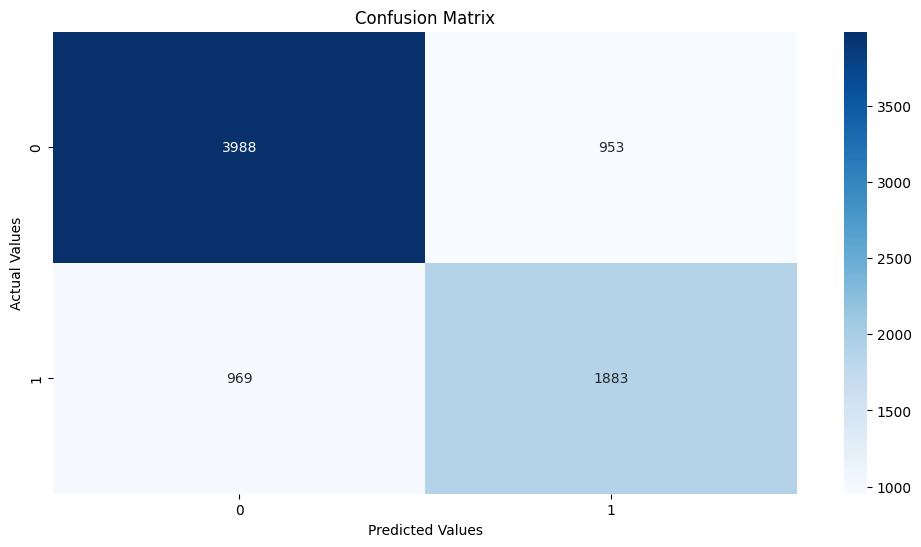

In [175]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [176]:
test_fpr, test_tpr, threshold = roc_curve(y_test, y_pred_probs)
test_roc_auc = auc(test_fpr, test_tpr)

In [177]:
train_fpr, train_tpr, threshold = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
train_roc_auc = auc(train_fpr, train_tpr)

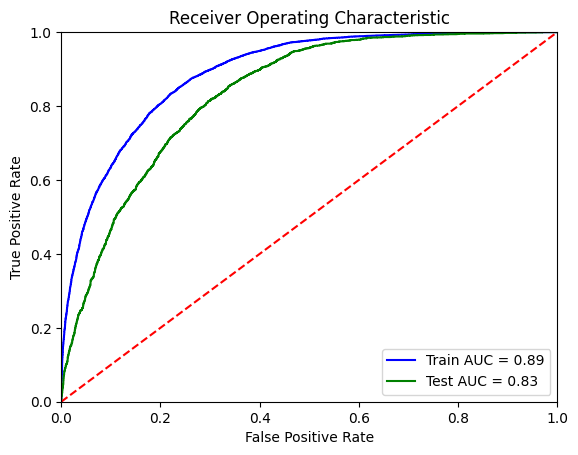

In [178]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc)
plt.plot(test_fpr, test_tpr, 'g', label = 'Test AUC = %0.2f' % test_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()